## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv('grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

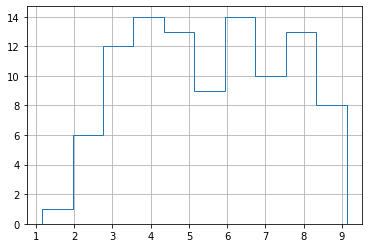

In [6]:
pop.grade.hist(histtype='step')

In [7]:
# Summary statistics
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [21]:
# Summary statistics using bootstrapping
# This is 100 different samples
pop.sample(100,replace=True).describe()

100

In [23]:
# Select 100 random sample of grades
pop.sample(100,replace=True).grade

88    2.313363
49    5.844761
44    3.791128
40    5.043670
91    8.888042
        ...   
86    8.522332
14    6.832996
50    4.212469
63    7.687033
16    3.267280
Name: grade, Length: 100, dtype: float64

In [22]:
# Create a boostrap sample of mean grades
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

0      5.202426
1      5.843034
2      5.342524
3      5.266797
4      5.490016
         ...   
995    5.365947
996    5.363582
997    5.472759
998    5.657068
999    5.441542
Name: meangrade, Length: 1000, dtype: float64

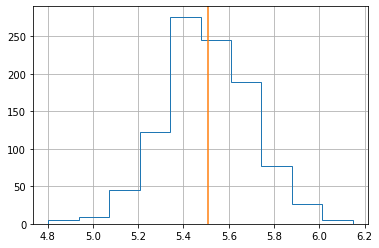

In [10]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(),color='C1')

In [11]:
# Extract the 95% confidence interval
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.139827863981978, 5.893066996566257)

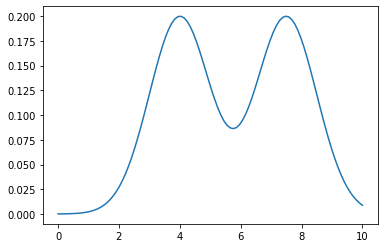

In [12]:
# Create a normal distribution
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [13]:
# Draw random variables from distribution
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [14]:
draw()

9.806519664651347

In [15]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

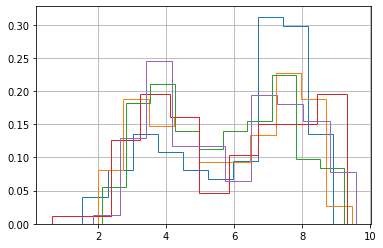

In [16]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [17]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

<AxesSubplot:>

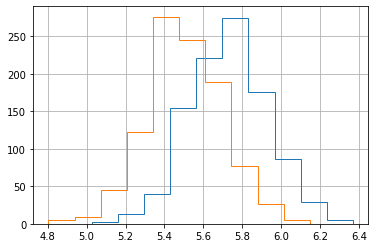

In [18]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')